# Bayesian Data Analysis in Python

## Chapter 3

In [12]:
import numpy as np
import pandas as pd
import arviz as az
import seaborn as sns
from matplotlib import pyplot as plt

In [13]:
tosses = [1, 0, 0, 1, 0, 1, 1, 1, 0, 1]

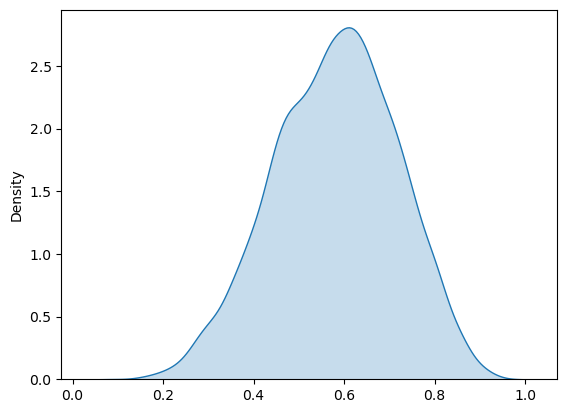

In [14]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 1
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, fill=True)
plt.show()

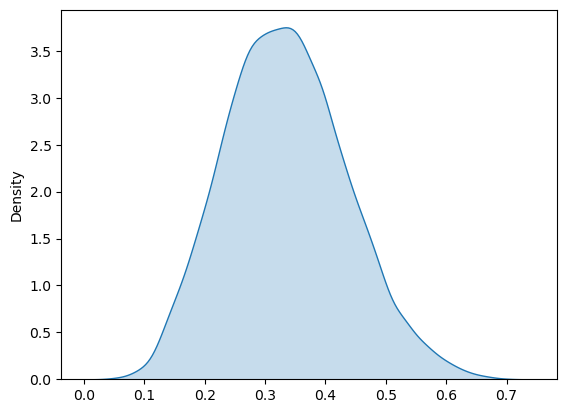

In [15]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 10
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)    

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, fill=True)
plt.show()

based on the binomial data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) prior shifts the posterior to the left compared to Beta(1, 1). This effect is quite strong, as there is little data: just 10 coin flips. 

In [16]:
ads = pd.read_csv("ads.csv")
ads

,user_id,product,site_version,time,banner_clicked
0,f500b9f27ac611426935de6f7a52b71f,clothes,desktop,2019-01-28 16:47:08,0
1,cb4347c030a063c63a555a354984562f,sneakers,mobile,2019-03-31 17:34:59,0
2,89cec38a654319548af585f4c1c76b51,clothes,mobile,2019-02-06 09:22:50,0
3,1d4ea406d45686bdbb49476576a1a985,sneakers,mobile,2019-05-23 08:07:07,0
4,d14b9468a1f9a405fa801a64920367fe,clothes,mobile,2019-01-28 08:16:37,0
...,...,...,...,...,...
9995,7ca28ccde263a675d7ab7060e9ed0eca,clothes,mobile,2019-02-02 08:19:39,0
9996,7e2ec2631332c6c4527a1b78c7ede789,clothes,mobile,2019-04-04 03:27:05,0
9997,3b828da744e5785f1e67b5df3fda5571,clothes,mobile,2019-04-15 15:59:06,0
9998,6cce0527245bcc8519d698af2224c04a,clothes,mobile,2019-05-21 20:43:21,0


In [17]:
def simulate_beta_posterior(trials, beta_prior_a, beta_prior_b):
    num_successes = np.sum(trials)
    posterior_draws = np.random.beta(
        num_successes + beta_prior_a,
        len(trials) - num_successes + beta_prior_b,
        10000
    )

    return posterior_draws

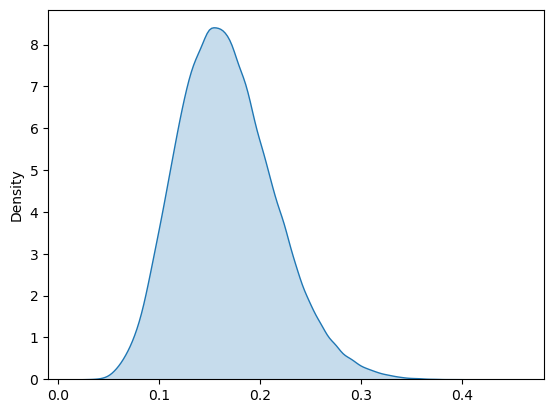

In [18]:
# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, fill=True, label="prior")
plt.show()

# Extract the banner_clicked column for each product
clothes_clicked = ads.loc[ads["product"] == "clothes"]["banner_clicked"]
sneakers_clicked = ads.loc[ads["product"] == "sneakers"]["banner_clicked"]

# Simulate posterior draws for each product
clothes_posterior = simulate_beta_posterior(clothes_clicked, 10, 50)
sneakers_posterior = simulate_beta_posterior(sneakers_clicked, 10, 50)

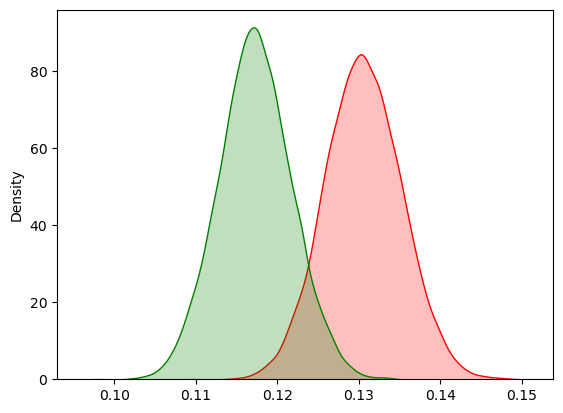

In [19]:
sns.kdeplot(clothes_posterior, fill=True, label="clothes", color="red")
sns.kdeplot(sneakers_posterior, fill=True, label="sneakers", color="green")
plt.show()

Since the two posteriors overlap, so it is actually possible for the sneakers campaign to be better. 

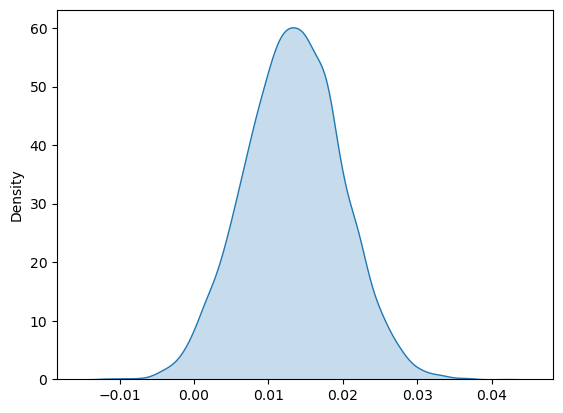

[0.00294828 0.02429622]
0.9809


In [20]:
# Calculate posterior difference and plot it
diff = clothes_posterior - sneakers_posterior
sns.kdeplot(diff, fill=True, label="diff")
plt.show()

# Calculate and print 90% credible interval of posterior difference
interval = az.hdi(diff, hdi_prob=0.9)
print(interval)

# Calculate and print probability of clothes ad being better
clothes_better_prob = (diff > 0).mean()
print(clothes_better_prob)

Take a look at the posterior density plot of the difference in click rates: it is very likely positive, indicating that clothes are likely better. The credible interval indicates that with 90% probability, the clothes ads click rate is up to 2.4 percentage points higher than the one for sneakers. Finally, the probability that the clothes click rate is higher is 98%. Great! But there is a 2% chance that actually sneakers ads are better!

In [21]:
# Slice diff to take only cases where it is negative
loss = diff[diff < 0]

# Compute and print expected loss
expected_loss = loss.mean()
print(expected_loss)

-0.002283989908302432


You can sefely roll out the clothes campaign to a larger audience. You are 98% sure it has a higher click rare, and even if the 2% risk of this being a wrong decision materializes, you will only lose 0.2 percentage points in the click rate, which is a very small risk!